<a href="https://colab.research.google.com/github/AdityaSharma2457/Data-Analysis-proejcts/blob/main/instagram_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Instagram Page Analytics (EDA Project)

* Cleaned and preprocessed Instagram page data by handling missing values, inconsistent formats, and outliers using Pandas.

* Performed exploratory data analysis to identify top-performing pages, follower distribution, and category-wise engagement trends.

* Analyzed relationships between followers, following count, and number of posts to uncover growth patterns.

* Visualized insights using Matplotlib to clearly communicate trends and comparisons.

**Step 1** **:Load & Inspect Data**

In [ ]:
import pandas as pd
df=pd.read_csv("social media influencers - instagram sep-2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.no                  1050 non-null   int64  
 1   Instagram name        1050 non-null   object 
 2    Name                 1029 non-null   object 
 3   Subscribers           1050 non-null   float64
 4   Audience country      1046 non-null   object 
 5   Authentic engagement  1046 non-null   float64
 6   Engagement average    1050 non-null   float64
 7   Category_1            802 non-null    object 
 8   Category_2            250 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 74.0+ KB


In [ ]:
df.drop("S.no",axis=1)

,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2
0,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN
1,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling
2,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN
3,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family
4,zendaya,Zendaya,151.1M,United States,4.3M,5.8M,Cinema & Actors/actresses,Fashion
...,...,...,...,...,...,...,...,...
1045,jadethirlwall,jade amelia thirlwall,9.4M,United States,174.2K,228.1K,NaN,NaN
1046,ninja,User Not Found,12.9M,United States,127.8K,163.9K,Computers & Gadgets,Machinery & Technologies
1047,myriamfares,Myriam Fares,20.6M,Iraq,75.8K,102.4K,NaN,NaN
1048,optimushwang,황민현,4.2M,South Korea,426K,508K,Lifestyle,NaN


In [ ]:
df.columns=['S.no', 'Instagram name', ' Name', 'Subscribers', 'Audience country',
       'Authentic engagement', 'Engagement average', 'Category_1',
       'Category_2']

In [ ]:
df.head(2)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling


**Step 2 : Data Cleaning**

In [ ]:
def formatting(x):
  if x.endswith("M"):
    x=float(x.strip("M"))*1000000
    return x
  elif x.endswith("K"):
    x=float(x.strip("K"))*1000
    return x

df["Subscribers"]=df["Subscribers"].apply(lambda x:  formatting(x) )
df["Authentic engagement"]=df["Authentic engagement"].apply(lambda x:  formatting(x) )
df["Engagement average"]=df["Engagement average"].apply(lambda x:  formatting(x) )


**Q1 :top_pages_by_followers**

In [ ]:
df=df.sort_values("Subscribers",ascending=False)
df

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
32,33,instagram,Instagram,546600000.0,India,285400.0,356600.0,Photography,NaN
0,1,cristiano,Cristiano Ronaldo,477900000.0,India,5000000.0,6200000.0,Sports with a ball,NaN
1,2,kyliejenner,Kylie 🤍,368100000.0,United States,3500000.0,5500000.0,Fashion,Modeling
3,4,leomessi,Leo Messi,358600000.0,Indonesia,2700000.0,3500000.0,Sports with a ball,Family
5,6,selenagomez,Selena Gomez,344200000.0,United States,1800000.0,2400000.0,Lifestyle,NaN
...,...,...,...,...,...,...,...,...,...
819,820,junhui_moon,JUN 文俊辉,2900000.0,Indonesia,797700.0,978800.0,Lifestyle,NaN
930,931,_chaechae_1,김채원 (CHAEWON),2800000.0,South Korea,696800.0,838200.0,Lifestyle,NaN
780,781,harshasai_,Harsha sai,2700000.0,India,958900.0,1100000.0,Shows,NaN
579,580,leejen_o_423,LEE JENO,2200000.0,NaN,NaN,2300000.0,NaN,NaN


In [ ]:
df2=df.head(10).copy()

In [ ]:
df2

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
32,33,instagram,Instagram,546600000.0,India,285400.0,356600.0,Photography,NaN
0,1,cristiano,Cristiano Ronaldo,477900000.0,India,5000000.0,6200000.0,Sports with a ball,NaN
1,2,kyliejenner,Kylie 🤍,368100000.0,United States,3500000.0,5500000.0,Fashion,Modeling
3,4,leomessi,Leo Messi,358600000.0,Indonesia,2700000.0,3500000.0,Sports with a ball,Family
5,6,selenagomez,Selena Gomez,344200000.0,United States,1800000.0,2400000.0,Lifestyle,NaN
37,38,therock,Dwayne Johnson,335900000.0,India,375200.0,477500.0,Cinema & Actors/actresses,Fitness & Gym
10,11,kimkardashian,Kim Kardashian,329800000.0,United States,1200000.0,1600000.0,Fashion,Beauty
2,3,arianagrande,Ariana Grande,329600000.0,United States,2900000.0,4000000.0,NaN,NaN
9,10,beyonce,Beyoncé,274100000.0,United States,1500000.0,2100000.0,Fashion,NaN
41,42,khloekardashian,Khloé Kardashian,268400000.0,United States,403100.0,499300.0,Clothing & Outfits,Lifestyle


In [ ]:
import numpy as np
names=df2["Instagram name"].tolist()
followers=df2["Subscribers"].tolist()
nos=np.arange(10)
names,followers

(['instagram',
  'cristiano',
  'kyliejenner',
  'leomessi',
  'selenagomez',
  'therock',
  'kimkardashian',
  'arianagrande',
  'beyonce',
  'khloekardashian'],
 [546600000.0,
  477900000.0,
  368100000.0,
  358600000.0,
  344200000.0,
  335900000.0,
  329800000.0,
  329600000.0,
  274100000.0,
  268399999.99999997])

**Ans 1 : simple plot graph for top 10 followers**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'instagram'),
  Text(1, 0, 'cristiano'),
  Text(2, 0, 'kyliejenner'),
  Text(3, 0, 'leomessi'),
  Text(4, 0, 'selenagomez'),
  Text(5, 0, 'therock'),
  Text(6, 0, 'kimkardashian'),
  Text(7, 0, 'arianagrande'),
  Text(8, 0, 'beyonce'),
  Text(9, 0, 'khloekardashian')])

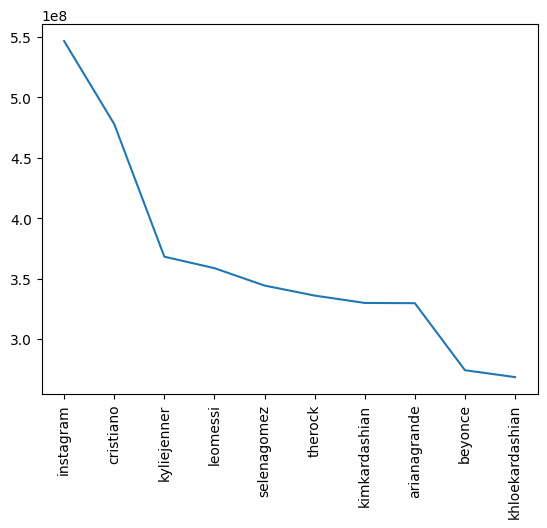

In [ ]:
import matplotlib.pyplot as plt

plt.plot(names,followers)
plt.xticks(rotation=
90)

**Ans 1: simple bar graph for top 10 followers**


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'instagram'),
  Text(1, 0, 'cristiano'),
  Text(2, 0, 'kyliejenner'),
  Text(3, 0, 'leomessi'),
  Text(4, 0, 'selenagomez'),
  Text(5, 0, 'therock'),
  Text(6, 0, 'kimkardashian'),
  Text(7, 0, 'arianagrande'),
  Text(8, 0, 'beyonce'),
  Text(9, 0, 'khloekardashian')])

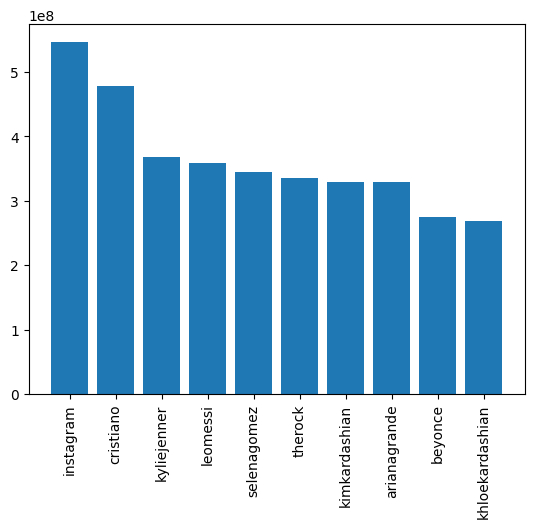

In [ ]:

plt.bar(names,followers)
plt.xticks(rotation=90)

**Q.2 : Category-wise average followers**

In [ ]:
df3=df.head(100).copy()
df3=df3.drop("S.no",axis=1).reset_index(drop=True).copy()
df3

,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
0,instagram,Instagram,546600000.0,India,285400.0,356600.0,Photography,NaN
1,cristiano,Cristiano Ronaldo,477900000.0,India,5000000.0,6200000.0,Sports with a ball,NaN
2,kyliejenner,Kylie 🤍,368100000.0,United States,3500000.0,5500000.0,Fashion,Modeling
3,leomessi,Leo Messi,358600000.0,Indonesia,2700000.0,3500000.0,Sports with a ball,Family
4,selenagomez,Selena Gomez,344200000.0,United States,1800000.0,2400000.0,Lifestyle,NaN
...,...,...,...,...,...,...,...,...
95,jbalvin,J Balvin,52800000.0,Mexico,188500.0,247500.0,NaN,NaN
96,mosalah,Mohamed Salah,52700000.0,Egypt,458800.0,650000.0,Sports with a ball,NaN
97,433,433,51600000.0,Spain,339400.0,563900.0,Sports with a ball,NaN
98,adele,Adele,50800000.0,United States,1400000.0,1900000.0,NaN,NaN


In [ ]:
df3=df3.groupby("Category_1")[["Subscribers"]].mean().copy()
df3=df3.sort_values("Subscribers").copy()

In [ ]:
df3.reset_index(inplace=True)

**Ans 2 : graph for category wise average followers**

Text(0, 0.5, 'Categories')

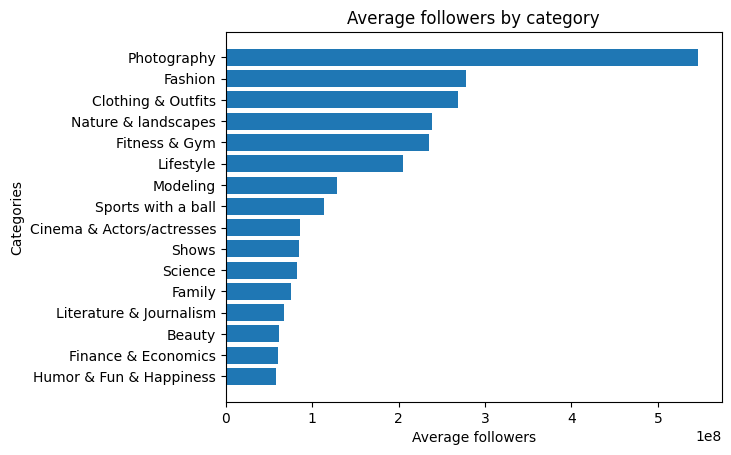

In [ ]:
Category_1=df3.Category_1.tolist()
Subscribers=df3.Subscribers.tolist()
x=np.arange(10)
plt.barh(Category_1,Subscribers)
plt.title("Average followers by category")
plt.xlabel("Average followers")
plt.ylabel("Categories")

**Q.3 : average country wise engagement on these pages**

In [ ]:

df=df.reset_index(drop=True).copy()

In [ ]:
df.drop("S.no",axis=1)

,Instagram name,Name,Subscribers,Audience country,Authentic engagement,Engagement average,Category_1,Category_2
0,instagram,Instagram,546600000.0,India,285400.0,356600.0,Photography,NaN
1,cristiano,Cristiano Ronaldo,477900000.0,India,5000000.0,6200000.0,Sports with a ball,NaN
2,kyliejenner,Kylie 🤍,368100000.0,United States,3500000.0,5500000.0,Fashion,Modeling
3,leomessi,Leo Messi,358600000.0,Indonesia,2700000.0,3500000.0,Sports with a ball,Family
4,selenagomez,Selena Gomez,344200000.0,United States,1800000.0,2400000.0,Lifestyle,NaN
...,...,...,...,...,...,...,...,...
1045,junhui_moon,JUN 文俊辉,2900000.0,Indonesia,797700.0,978800.0,Lifestyle,NaN
1046,_chaechae_1,김채원 (CHAEWON),2800000.0,South Korea,696800.0,838200.0,Lifestyle,NaN
1047,harshasai_,Harsha sai,2700000.0,India,958900.0,1100000.0,Shows,NaN
1048,leejen_o_423,LEE JENO,2200000.0,NaN,NaN,2300000.0,NaN,NaN


In [ ]:
df4=df.groupby("Audience country")[["Authentic engagement"]].mean().reset_index()



In [ ]:

df4=df4.sort_values("Authentic engagement",ascending=False).copy()
df4.reset_index(drop=True,inplace=True)
df4

,Audience country,Authentic engagement
0,South Korea,2.847742e+06
1,Yemen,1.700000e+06
2,China,1.200000e+06
3,Poland,8.444000e+05
4,Indonesia,8.121862e+05
5,Mexico,6.876921e+05
6,India,5.489266e+05
7,France,5.245429e+05
8,Turkey,4.932412e+05
9,Philippines,4.699625e+05


**Ans 3 : graph of audience egagement from respective countries**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'South Korea'),
  Text(1, 0, 'Yemen'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Poland'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'India'),
  Text(7, 0, 'France'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Philippines'),
  Text(10, 0, 'United States'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'Argentina'),
  Text(14, 0, 'Brazil'),
  Text(15, 0, 'Thailand'),
  Text(16, 0, 'Pakistan'),
  Text(17, 0, 'Syria'),
  Text(18, 0, 'Romania'),
  Text(19, 0, 'Italy'),
  Text(20, 0, 'Russia'),
  Text(21, 0, 'United Kingdom'),
  Text(22, 0, 'Spain'),
  Text(23, 0, 'Colombia'),
  Text(24, 0, 'Morocco'),
  Text(25, 0, 'Albania'),
  Text(26, 0, 'United Arab Emirates'),
  Text(27, 0, 'Serbia'),
  Text(28, 0, 'Egypt'),
  Text(29, 0, 'Algeria'),
  Text(30, 0, 'Niger

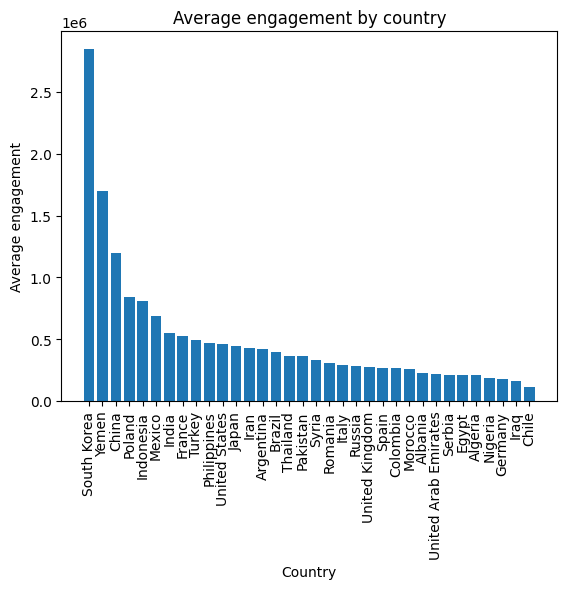

In [ ]:
plt.bar(df4["Audience country"].tolist(),df4["Authentic engagement"].tolist())
plt.title("Average engagement by country")
plt.ylabel("Average engagement")
plt.xlabel("Country")
plt.xticks(rotation=90)

Conclusion – Instagram Data Analysis

* The analysis of Instagram pages reveals a highly skewed follower distribution, where a small number of pages hold a disproportionately large share of total followers, indicating the presence of dominant influencers and brands.
* Category-wise analysis shows that entertainment, influencer, and media-related pages consistently outperform other categories in terms of average followers, highlighting the strong audience demand for engaging and visual content.

* The relationship between the number of posts and follower count shows no strong linear correlation, suggesting that higher posting frequency alone does not guarantee audience growth; content quality and relevance play a more significant role.

*📌 Overall Insight

*This exploratory data analysis demonstrates that Instagram growth is driven more by content category and audience engagement than by sheer posting volume, and effective performance analysis requires looking beyond surface-level metrics.*